## Step 1: download the Flight data from 2008

+ We're interested in predicting Departure Delays!

http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
import pandas as pd

df = pd.read_csv("/Users/jamiew/GA-DataScience/GA-MyDSRepo/lesson-7/2008.csv").fillna("unk")

In [5]:
df2 = df.loc[df['DepDelay']!="unk"].head(10000).copy()

In [6]:
df2.shape

(10000, 29)

In [7]:
pd.options.display.max_columns = 999

df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,unk,0,unk,unk,unk,unk,unk
1,2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,unk,0,unk,unk,unk,unk,unk
2,2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,unk,0,unk,unk,unk,unk,unk
3,2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,unk,0,unk,unk,unk,unk,unk
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,unk,0,2,0,0,0,32


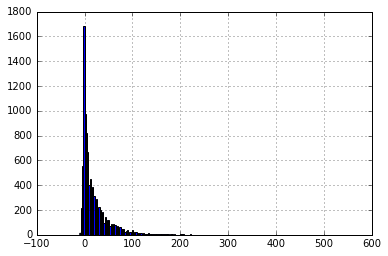

In [9]:
%matplotlib inline
df2['DepDelay'].hist(bins=200)

In [10]:
df2.loc[df2['DepDelay']>30]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,unk,0,2,0,0,0,32
6,2008,1,3,4,1937,1830,2037,1940,WN,509,N763SW,240,250,230,57,67,IND,LAS,1591,3,7,0,unk,0,10,0,0,0,47
11,2008,1,3,4,1644,1510,1845,1725,WN,1333,N334SW,121,135,107,80,94,IND,MCO,828,6,8,0,unk,0,8,0,0,0,72
19,2008,1,3,4,1416,1325,1512,1435,WN,54,N643SW,56,70,49,37,51,ISP,BWI,220,2,5,0,unk,0,12,0,0,0,25
21,2008,1,3,4,1657,1625,1754,1735,WN,623,N724SW,57,70,47,19,32,ISP,BWI,220,5,5,0,unk,0,7,0,0,0,12
26,2008,1,3,4,1422,1255,1657,1610,WN,188,N215WN,155,195,143,47,87,ISP,FLL,1093,6,6,0,unk,0,40,0,0,0,7
30,2008,1,3,4,2107,1945,2334,2230,WN,362,N798SW,147,165,134,64,82,ISP,MCO,972,6,7,0,unk,0,5,0,0,0,59
35,2008,1,3,4,1634,1555,1859,1845,WN,3480,N443WN,145,170,134,14,39,ISP,MCO,972,5,6,0,unk,0,unk,unk,unk,unk,unk
37,2008,1,3,4,1812,1650,1927,1815,WN,422,N779SW,135,145,118,72,82,ISP,MDW,765,6,11,0,unk,0,3,0,0,0,69
40,2008,1,3,4,1326,1230,1559,1530,WN,1056,N459WN,153,180,143,29,56,ISP,PBI,1052,5,5,0,unk,0,0,0,0,0,29


In [13]:
#lets try with shape
print df2.loc[df2['DepDelay']>10].shape
print df2.loc[df2['DepDelay']<=10].shape

(4681, 29)
(5319, 29)


In [17]:
#now create new variable called "LaterThan10"
df2.loc[:,"LaterThan10"] = 0
df2.loc[df2["DepDelay"] > 10], "LaterThan10"] #Fill this in later

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,LaterThan10
1,2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,unk,0,unk,unk,unk,unk,unk,0
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,N464WN,90,90,77,34,34,IND,BWI,515,3,10,0,unk,0,2,0,0,0,32,0
5,2008,1,3,4,1940,1915,2121,2110,WN,378,N726SW,101,115,87,11,25,IND,JAX,688,4,10,0,unk,0,unk,unk,unk,unk,unk,0
6,2008,1,3,4,1937,1830,2037,1940,WN,509,N763SW,240,250,230,57,67,IND,LAS,1591,3,7,0,unk,0,10,0,0,0,47,0
11,2008,1,3,4,1644,1510,1845,1725,WN,1333,N334SW,121,135,107,80,94,IND,MCO,828,6,8,0,unk,0,8,0,0,0,72,0
16,2008,1,3,4,1452,1425,1640,1625,WN,675,N286WN,228,240,213,15,27,IND,PHX,1489,7,8,0,unk,0,3,0,0,0,12,0
18,2008,1,3,4,1323,1255,1526,1510,WN,4,N674AA,123,135,110,16,28,IND,TPA,838,4,9,0,unk,0,0,0,0,0,16,0
19,2008,1,3,4,1416,1325,1512,1435,WN,54,N643SW,56,70,49,37,51,ISP,BWI,220,2,5,0,unk,0,12,0,0,0,25,0
21,2008,1,3,4,1657,1625,1754,1735,WN,623,N724SW,57,70,47,19,32,ISP,BWI,220,5,5,0,unk,0,7,0,0,0,12,0
22,2008,1,3,4,1900,1840,1956,1950,WN,717,N786SW,56,70,49,6,20,ISP,BWI,220,2,5,0,unk,0,unk,unk,unk,unk,unk,0


### This dataset is WAY TOO BIG for the get_dummies function

+ Feel free to test it out and eventually use the "interrupt" function when you get bored
+ Hey maybe it still works? Who knows. It took a while for me. 

In [ ]:
##pd.get_dummies(df[['TailNum', 'Origin', 'Dest']])

### Let's first investigate the String Vars here

In [ ]:
df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].head(10)

In [ ]:
df2['CancellationCode'].value_counts()

## We can use the Label Encoder to map the Strings to numbers!

+ THESE ARE NOT DUMMY VARIABLES
+ Note the fit vs fit_transform function

In [ ]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()

le.fit(df2['TailNum'])

le.transform(df2['TailNum'])



### Alternative: sklearn.preprocessing.LabelBinarizer

In [ ]:
df2['TailNum'] = df2['TailNum'].apply(str)

In [ ]:
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()

lb.fit(df2['TailNum'])

lb.transform(df2['TailNum']
             


### TASK: How can you transform all character variables into numbers? 

+ Take 10 minutes to work with your partner

In [ ]:
#df2.loc[:, ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']] = df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].apply(lambda x: le.fit_transform(x), axis=0)


## Alternative

In [20]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

lb = MultiLabelBinarizer()

testX = lb.fit_transform(df2[['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']].as_matrix())

In [21]:
testX

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 0]])

In [23]:
lb.classes_
#use this information to your advantage: read into a dataframe (see below)

array([0, 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BHM', 'BNA', 'BOI', 'BUF',
       'BUR', 'BWI', 'CLE', 'CMH', 'CRP', 'DAL', 'DEN', 'DTW', 'ELP',
       'FLL', 'GEG', 'HOU', 'HRL', 'IAD', 'IND', 'ISP', 'JAN', 'JAX',
       'LAS', 'LAX', 'LBB', 'LIT', 'MAF', 'MCI', 'MCO', 'MDW', 'MHT',
       'MSY', 'N200WN', 'N201LV', 'N202WN', 'N203WN', 'N204WN', 'N205WN',
       'N206WN', 'N207WN', 'N208WN', 'N209WN', 'N210WN', 'N211WN',
       'N212WN', 'N213WN', 'N214WN', 'N215WN', 'N216WR', 'N217JC',
       'N218WN', 'N219WN', 'N220WN', 'N221WN', 'N222WN', 'N223WN',
       'N224WN', 'N225WN', 'N226WN', 'N227WN', 'N228WN', 'N229WN',
       'N230WN', 'N231WN', 'N232WN', 'N233LV', 'N234WN', 'N235WN',
       'N236WN', 'N237WN', 'N238WN', 'N239WN', 'N240WN', 'N241WN',
       'N242WN', 'N243WN', 'N244WN', 'N245WN', 'N246LV', 'N247WN',
       'N248WN', 'N249WN', 'N250WN', 'N251WN', 'N252WN', 'N253WN',
       'N254WN', 'N255WN', 'N256WN', 'N257WN', 'N258WN', 'N259WN',
       'N260WN', 'N261WN', 'N262WN', 'N2

In [50]:
df2.loc[df2['CancellationCode']=='B', 'CancellationCode'].value_counts()

B    51
Name: CancellationCode, dtype: int64

In [51]:
pd.DataFrame(data=testX, columns = lb.classes_)['B'].value_counts()

0    9949
1      51
Name: B, dtype: int64

In [54]:
testX

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ..., 
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [24]:
textXdf = pd.DataFrame(data=testX, columns = lb.classes_)

In [31]:
import numpy as np

np.concatenate(testX, df2['ArrDelay'].as_matrix())

KeyError: 'ArrDelay'

In [25]:
y = df2['DepDelay']

df2.drop(['DepDelay'], axis = 1, inplace = True, errors = 'ignore')

In [26]:
df2.drop(['ArrDelay'], axis =1, inplace = True, errors = 'ignore')

In [27]:
df2.loc[:, 'CRSDepTime'] = df2['CRSDepTime'].astype(float)

In [28]:
import numpy as np

(df2.dtypes==np.int64).tolist()

is_cat_list = (df2.dtypes==np.int64).tolist()

In [ ]:
df2.head()

### Now as a replacement for get_dummies we have OneHotEncoder

+ BUT YOU NEED TO SPECIFY WHICH VARIABLES ARE CATEGORICAL
+ Could we use "integer" type as a proxy for that?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(categorical_features = is_cat_list, sparse=False)

onehot.fit(df2)

X =onehot.transform(df2)


In [ ]:
X

In [ ]:
print X.shape

### Note that OneHot Encoder returns a sparse matrix

+ What is a sparse matrix?

In [ ]:
##This is how big the dataset is

X.shape

### Assignment part I - 15 minutes

+ Using a subsection of the full dataset...
    - (otherwise it will be impossibly large)
    - Create interaction variables for month and ArrDelay
    - Note that Month must first be a dummy variable
    - There are many ways to do this

### Assignment Part II

+ Run a Ridge regression with month dummies, arrival delay and the interaction vars
+ Keep track of the coefficients by saving the names to a list
+ Which variables are larger than zero? 
+ How does your model perform on the testing set?

In [ ]:
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [ ]:
from sklearn import linear_model
lr = linear_model.Ridge(normalize=True)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
print lr.coef_

In [ ]:
y_hat = lr.predict(X_train)


In [ ]:
%matplotlib inline

(y_train - y_hat).hist(bins=100)